In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
from math import ceil

In [47]:
label_markers = ['true', 'random_labels', 'shuffled', 'random_pixels', 'gaussian']

datasets = []
for label in label_markers:
    label_data = pd.DataFrame()
    for file in os.listdir(os.getcwd()):
        if ".csv" in file and label in file:
            path = os.path.join(os.getcwd(), file)
            data = pd.read_csv(path)
            label_data = label_data.append(data, sort = False)
    datasets.append(data)

In [58]:
bs = 200
spe = ceil(50000 / bs)

for dataset in datasets:
    dataset["thousand steps"] = ((dataset["epoch"] + 1)*spe)/1000

In [72]:
true_label_format = [{'c': "blue", 'marker': 's', 'edgecolors': 'black'},
                    {'c': "blue"}]

random_label_format = [{'c': "red", 'marker': 'o', 'edgecolors': 'black'},
                    {'c': "red"}]

shuffled_pixel_format = [{'c': '#00ff00', 'marker': '*', 'edgecolors': 'black'},
                    {'c': '#00ff00'}]

random_pixel_format = [{'c': None, 'marker': None, 'edgecolors': None},
                    {'c': "#D742F4"}]

gaussian_format = [{'c': 'black', 'marker': 'D', 'edgecolors': 'black'},
                    {'c': "black"}]

formats = [true_label_format, random_label_format, shuffled_pixel_format, random_pixel_format, gaussian_format]

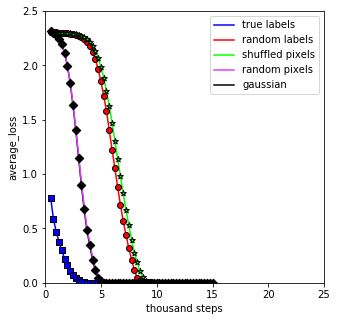

In [75]:
%matplotlib inline
plt.figure(figsize=(5,5))
i = 0
for dataset, data_format in zip(datasets, formats):
    z = 5 if i == 3 else 0
    if i != 3:
        plt.scatter(dataset["thousand steps"].values[1:],
                    dataset["loss"].values[1:],
                    zorder = 10,
                    **data_format[0])
    plt.plot(dataset["thousand steps"].values[1:],
            dataset["loss"].values[1:],
            zorder = z,
            **data_format[1]
           )

    i+=1

plt.legend(['true labels', 'random labels', 'shuffled pixels', 'random pixels', 'gaussian'])
plt.xlabel("thousand steps")
plt.ylabel("average_loss")
plt.xlim(0, 25)
plt.ylim(0, 2.5)
plt.savefig("output.eps")
plt.savefig("output.png")